## **🏨호텔 예약 취소 예측**

**Feature**

> **Booking_ID**: 예약 ID  
> **number of adults**: 성인 수  
> **number of children**: 자녀의 수  
> **number of weekend nights**: 주말 밤 수  
> **number of week nights**: 주중 밤 수  
> **type of meal**: 식사의 종류  
> **car parking space**: 주차 공간  
> **room type**: 객실 유형  
> **lead time**: 예약일과 도착일 사이의 일수  
> **market segment type**: 온라인/오프라인 예약 유형  
> **repeated**: 고객이 이전에 호텔에 방문한 적이 있는지 여부  
> **P-C**: 예약이 취소될 확률  
> **P-not-C**: 예약이 취소되지 않을 확률  
> **average price**: 평균 가격  
> **special requests**: 고객이 요청한 특별 서비스의 수  
> **date of reservation**: 예약 날짜  


**Target**

> **booking status**: 예약 상태  

In [1]:
import pandas as pd

hotel_df = pd.read_csv('./datasets/booking.csv')
hotel_df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [2]:
print(hotel_df.columns)

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')


In [3]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [4]:
# 결측치 검사
hotel_df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [5]:
# 데이터 복사
h_df = hotel_df.copy()

In [6]:
h_df['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [7]:
# 불필요한 컬럼 제거
h_df.drop(labels=['Booking_ID',
                  'P-C',
                  'P-not-C',
                  'date of reservation'
                  ], axis=1, inplace=True)
display(h_df)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,77.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,115.00,1,Canceled
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,107.55,1,Not_Canceled
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,105.61,1,Not_Canceled
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,96.90,1,Not_Canceled


In [8]:
h_df['type of meal'].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [9]:
# "type of meal" 컬럼에서 "Meal Plan 1", "Meal Plan 2", "Meal Plan 3"을 "Selected"로 변환
h_df['type of meal'] = h_df['type of meal'].replace(['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3'], 'Selected')

In [10]:
h_df['type of meal'].value_counts()

type of meal
Selected        31153
Not Selected     5132
Name: count, dtype: int64

In [11]:
h_df['room type'].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [12]:
h_df['room type'] = h_df['room type'].apply(lambda x: x[10])

In [13]:
h_df['room type'].value_counts()

room type
1    28138
4     6059
6      966
2      692
5      265
7      158
3        7
Name: count, dtype: int64

In [14]:
# 문자열 데이터 변환
from sklearn.preprocessing import LabelEncoder

meal_encoder = LabelEncoder()
meals = meal_encoder.fit_transform(h_df['type of meal'].tolist())
h_df['type of meal'] = meals

market_encoder = LabelEncoder()
markets = market_encoder.fit_transform(h_df['market segment type'].tolist())
h_df['market segment type'] = markets

booking_encoder = LabelEncoder()
bookings = booking_encoder.fit_transform(h_df['booking status'].tolist())
h_df['booking status'] = bookings

h_df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status
0,1,1,2,5,1,0,1,224,3,0,88.00,0,1
1,1,0,1,3,0,0,1,5,4,0,106.68,1,1
2,2,1,1,3,1,0,1,1,4,0,50.00,0,0
3,1,0,0,2,1,0,1,211,4,0,100.00,1,0
4,1,0,1,2,0,0,1,48,4,0,77.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,1,0,1,346,4,0,115.00,1,0
36281,2,0,1,3,1,0,1,34,4,0,107.55,1,1
36282,2,0,1,3,1,0,4,83,4,0,105.61,1,1
36283,3,0,0,4,1,0,1,121,3,0,96.90,1,1


array([[<Axes: title={'center': 'number of adults'}>,
        <Axes: title={'center': 'number of children'}>,
        <Axes: title={'center': 'number of weekend nights'}>],
       [<Axes: title={'center': 'number of week nights'}>,
        <Axes: title={'center': 'type of meal'}>,
        <Axes: title={'center': 'car parking space'}>],
       [<Axes: title={'center': 'lead time'}>,
        <Axes: title={'center': 'market segment type'}>,
        <Axes: title={'center': 'repeated'}>],
       [<Axes: title={'center': 'average price'}>,
        <Axes: title={'center': 'special requests'}>,
        <Axes: title={'center': 'booking status'}>]], dtype=object)

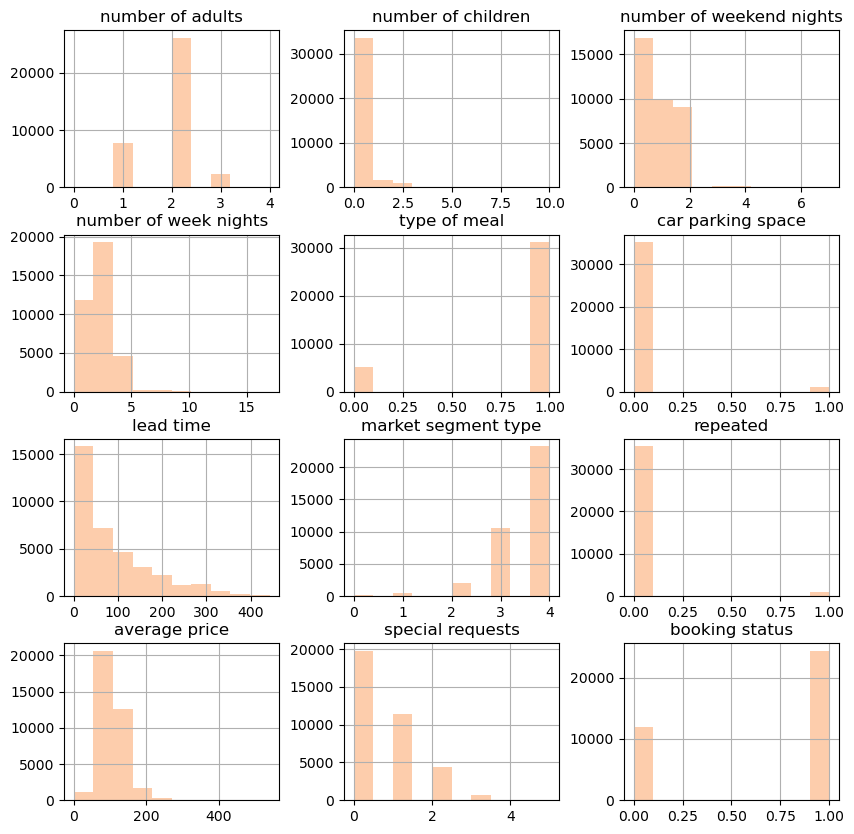

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel2')
# 컬러맵의 색상 선택
all_colors = cmap(np.array([0,4]))
# 히스토그램 그려보기
h_df.hist(figsize=(10, 10), color=cmap(np.array([1])))

In [16]:
h_df['room type'], _ = pd.factorize(h_df['room type'])
# 데이터 타입 확인
print(h_df.columns)
print(h_df.dtypes)

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated',
       'average price', 'special requests', 'booking status'],
      dtype='object')
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                  int64
car parking space             int64
room type                     int64
lead time                     int64
market segment type           int64
repeated                      int64
average price               float64
special requests              int64
booking status                int64
dtype: object


In [17]:
# 이상치 확인
import numpy as np
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

features = ['lead time', 'average price']

total_count = h_df.shape[0]
for feature in features:
    std_df = std.fit_transform(h_df[[feature]])
    count = ((std_df < -1.96) | (std_df > 1.96)).sum()
    print(f'{feature}: {count}건, {np.round(count / total_count * 100, 4)}%')

lead time: 2500건, 6.8899%
average price: 1999건, 5.5092%


In [18]:
# 이상치 제거
sbp_df = h_df.loc[:, 'average price'].reset_index()
std_sbp_df = std.fit_transform(sbp_df[['average price']])
sbp_df['average price'] = std_sbp_df
sbp_df = sbp_df[sbp_df['average price'].between(-1.96, 1.96)]
h_df = h_df.iloc[sbp_df.index].reset_index(drop=True)

sbp_df = h_df.loc[:, 'lead time'].reset_index()
std_sbp_df = std.fit_transform(sbp_df[['lead time']])
sbp_df['lead time'] = std_sbp_df
sbp_df = sbp_df[sbp_df['lead time'].between(-1.96, 1.96)]
h_df = h_df.iloc[sbp_df.index].reset_index(drop=True)

array([[<Axes: title={'center': 'number of adults'}>,
        <Axes: title={'center': 'number of children'}>,
        <Axes: title={'center': 'number of weekend nights'}>,
        <Axes: title={'center': 'number of week nights'}>],
       [<Axes: title={'center': 'type of meal'}>,
        <Axes: title={'center': 'car parking space'}>,
        <Axes: title={'center': 'room type'}>,
        <Axes: title={'center': 'lead time'}>],
       [<Axes: title={'center': 'market segment type'}>,
        <Axes: title={'center': 'repeated'}>,
        <Axes: title={'center': 'average price'}>,
        <Axes: title={'center': 'special requests'}>],
       [<Axes: title={'center': 'booking status'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

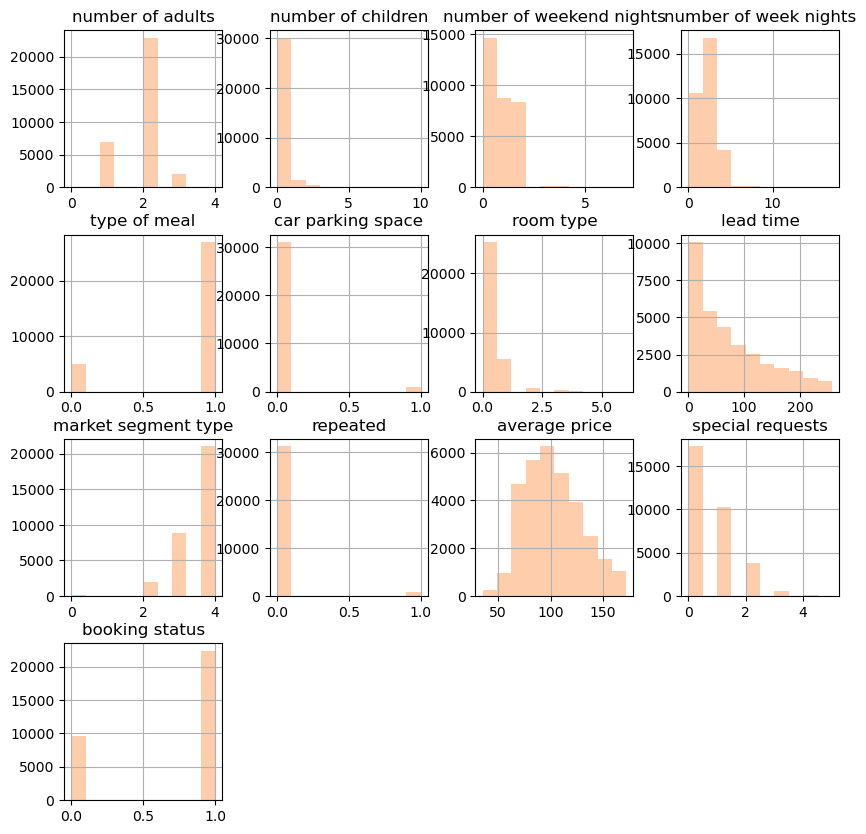

In [19]:
import matplotlib.pyplot as plt
# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel2')
# 컬러맵의 색상 선택
all_colors = cmap(np.array([0,4]))
# 히스토그램 그려보기
h_df.hist(figsize=(10, 10), color=cmap(np.array([1])))

Text(0.5, 1.0, 'Correlation')

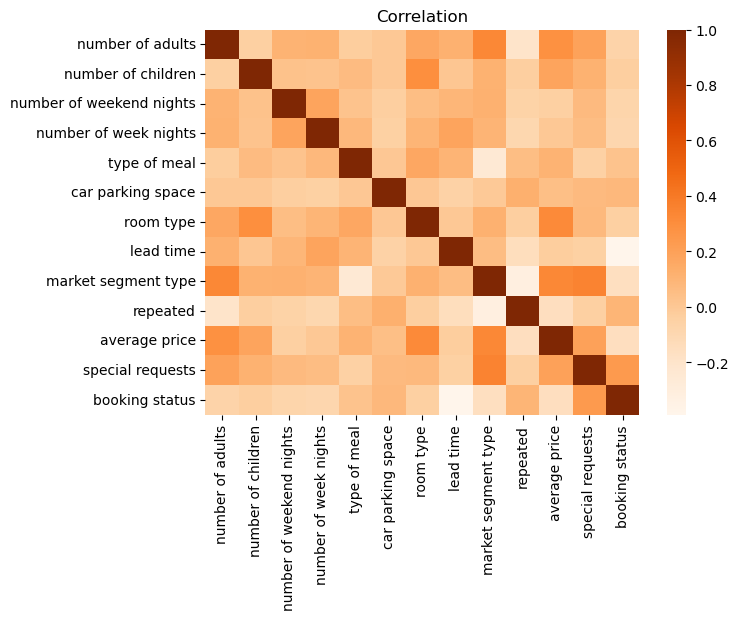

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = h_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")

In [122]:
corr['booking status'].sort_values(ascending=False)[1:]

special requests            0.236223
repeated                    0.099783
car parking space           0.079670
type of meal                0.025307
number of children         -0.033153
room type                  -0.038115
number of adults           -0.063822
number of weekend nights   -0.074637
number of week nights      -0.088008
average price              -0.149492
market segment type        -0.159561
lead time                  -0.388038
Name: booking status, dtype: float64

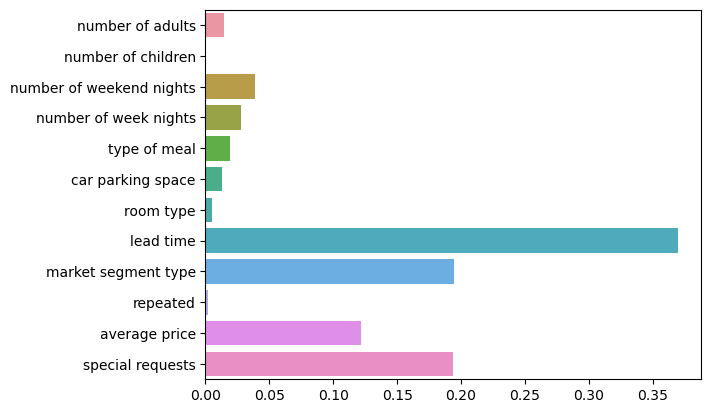

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()
#special requests 과 lead time 이 상관관계가 제일 높게 나타납니다.

In [126]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [124]:
# 전체 행의 특정 데이터 선택하여 피처로 지정, 타겟 데이터를 타겟으로 지정
features_d, targets_d = h_df.iloc[:, [7, 11]], h_df.iloc[:, -1]
features_d

,lead time,special requests
0,224,0
1,5,1
2,1,0
3,211,1
4,48,0
...,...,...
32011,48,0
32012,34,1
32013,83,1
32014,121,1


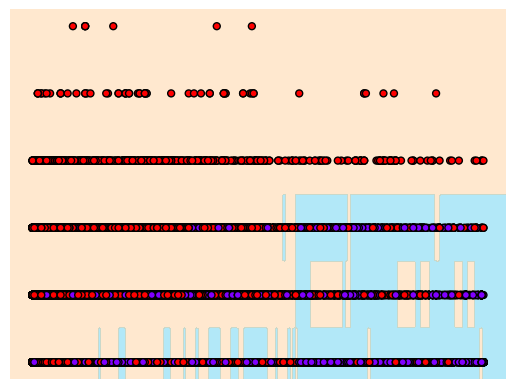

In [127]:
# 데이터 학습
dtc.fit(features_d, targets_d)

# 시각화 함수를 통해 데이터 시각화
visualize_boundary(dtc, features_d, targets_d)

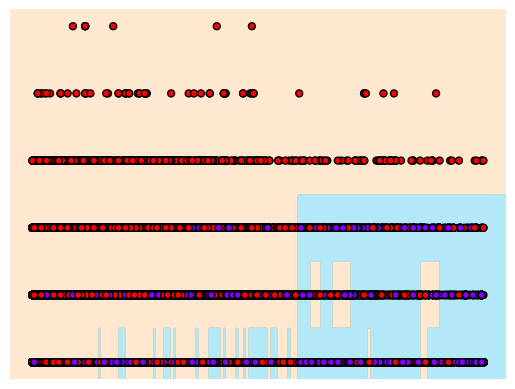

In [166]:
# 결정 트리의 무작위성을 제어하고 분류 모델 담기
dtc = DecisionTreeClassifier(random_state=124, min_samples_leaf=70)

# 데이터 학습
dtc.fit(features_d, targets_d)

# 시각화 함수를 통해 데이터 시각화
visualize_boundary(dtc, features_d, targets_d)

In [168]:
# 샘플 수를 60-80 으로 맞췄을 때 제일 나은 결과가 나옴. 이를 하이퍼 파라미터에 적용해본다.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

booking status
1    17847
0    17847
Name: count, dtype: int64

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


dtc_parameters = {'max_depth': [10, 20, 30], 'min_samples_split': [60, 70, 80]}
l_svc_parameters = {'C': [0.001, 0.01, 0.1]}
knn_parameters = {'n_neighbors': [3, 5, 7, 9, 11]}

dtc = DecisionTreeClassifier()
l_svc = LinearSVC(verbose=True)
knn = KNeighborsClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_l_svc = GridSearchCV(l_svc, param_grid=l_svc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_knn = GridSearchCV(knn, param_grid=knn_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

# knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
# g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [23]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [60, 70, 80]},
             return_train_score=True)

In [24]:
g_l_svc.fit(X_train_over, y_train_over)

[LibLinear]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearSVC(verbose=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1]}, return_train_score=True)

In [25]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

### **🚑 DTC**

In [26]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 60}",0.849975,1
1,"{'max_depth': 10, 'min_samples_split': 70}",0.848742,2
2,"{'max_depth': 10, 'min_samples_split': 80}",0.848042,3
3,"{'max_depth': 20, 'min_samples_split': 60}",0.847257,5
4,"{'max_depth': 20, 'min_samples_split': 70}",0.845212,8
5,"{'max_depth': 20, 'min_samples_split': 80}",0.845156,9
6,"{'max_depth': 30, 'min_samples_split': 60}",0.847649,4
7,"{'max_depth': 30, 'min_samples_split': 70}",0.845352,7
8,"{'max_depth': 30, 'min_samples_split': 80}",0.845408,6


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [28]:
import numpy as np
from sklearn.metrics import accuracy_score
prediction = dtc.predict(X_test)

오차 행렬
[[1448  398]
 [ 618 3940]]
정확도: 0.8413, 정밀도: 0.8046, 재현율: 0.8244, F1: 0.8130
################################################################################


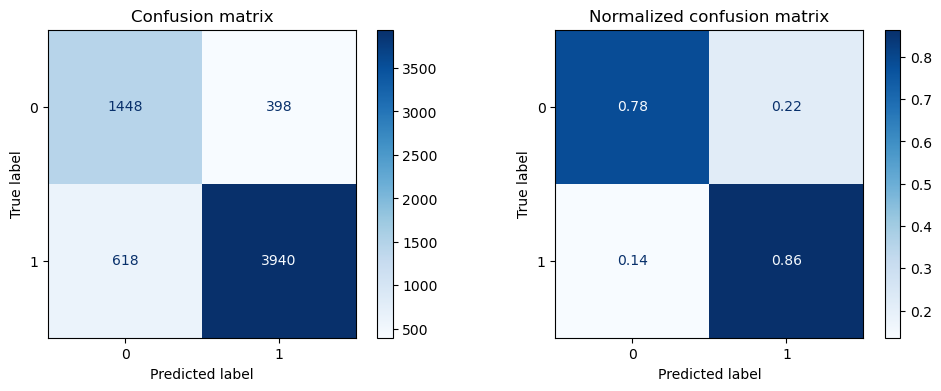

In [29]:
get_evaluation(y_test, prediction, dtc, X_test)

### **🚑 SVC**

In [30]:
l_svc_result_df = pd.DataFrame(g_l_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(l_svc_result_df)

,params,mean_test_score,rank_test_score
0,{'C': 0.001},0.771754,2
1,{'C': 0.01},0.774864,1
2,{'C': 0.1},0.646327,3


In [31]:
svc = g_l_svc.best_estimator_
prediction = g_l_svc.predict(X_test)

오차 행렬
[[1594  252]
 [1792 2766]]
정확도: 0.6808, 정밀도: 0.6936, 재현율: 0.7352, F1: 0.6698
################################################################################


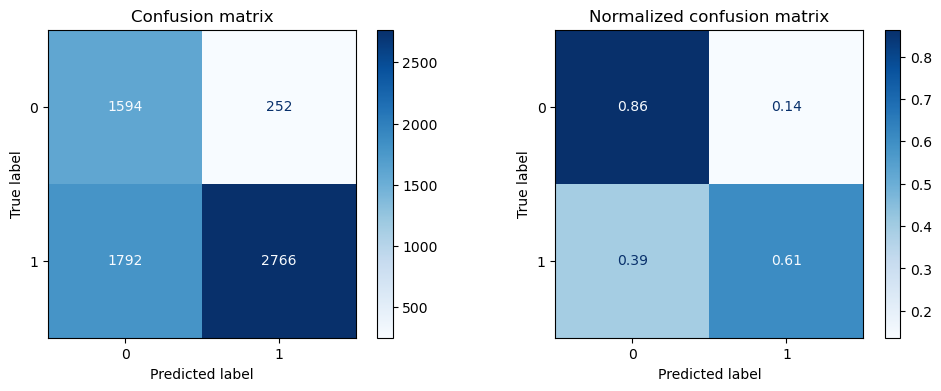

In [32]:
get_evaluation(y_test, prediction, svc, X_test)

### **🚑 KNN**

In [33]:
result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 3},0.841514,1
1,{'n_neighbors': 5},0.825965,2
2,{'n_neighbors': 7},0.817841,3
3,{'n_neighbors': 9},0.808399,4
4,{'n_neighbors': 11},0.799378,5


In [34]:
knn_c = g_knn.best_estimator_
prediction = knn_c.predict(X_test)

오차 행렬
[[1393  453]
 [ 840 3718]]
정확도: 0.7981, 정밀도: 0.7576, 재현율: 0.7852, F1: 0.7674
################################################################################


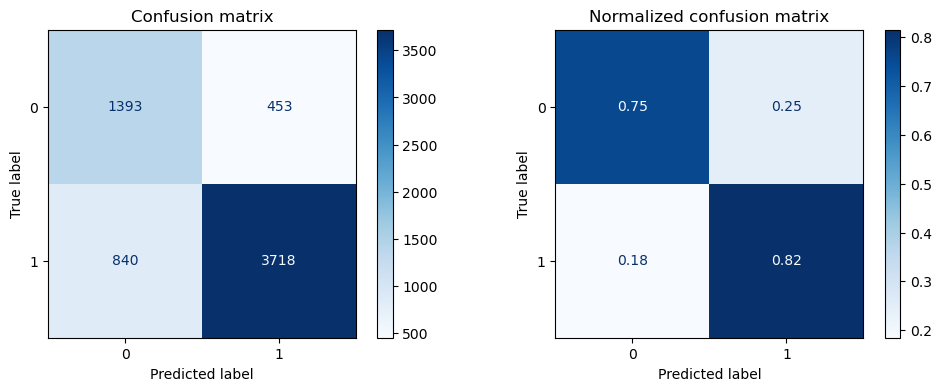

In [35]:
get_evaluation(y_test, prediction, knn_c, X_test)

#### 📊 1Cycle 결과 
분포가 좋지 않은 독립변수를 제거하고 진행해봅니다.

array([[<Axes: title={'center': 'number of adults'}>,
        <Axes: title={'center': 'number of children'}>,
        <Axes: title={'center': 'number of weekend nights'}>,
        <Axes: title={'center': 'number of week nights'}>],
       [<Axes: title={'center': 'type of meal'}>,
        <Axes: title={'center': 'car parking space'}>,
        <Axes: title={'center': 'room type'}>,
        <Axes: title={'center': 'lead time'}>],
       [<Axes: title={'center': 'market segment type'}>,
        <Axes: title={'center': 'repeated'}>,
        <Axes: title={'center': 'average price'}>,
        <Axes: title={'center': 'special requests'}>],
       [<Axes: title={'center': 'booking status'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

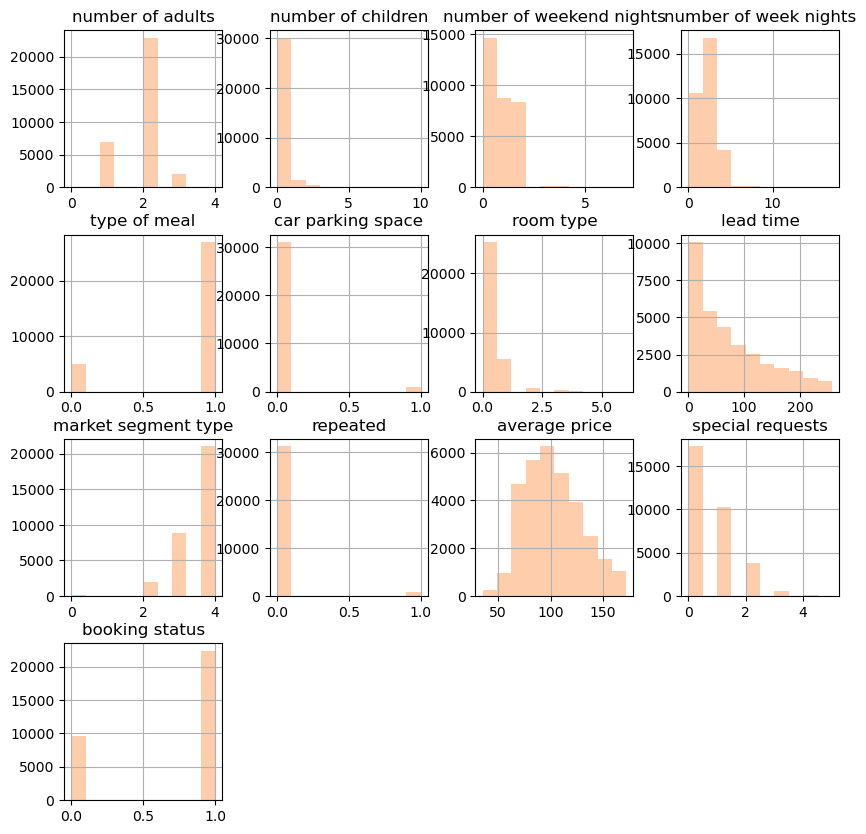

In [36]:
import matplotlib.pyplot as plt
# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel2')
# 컬러맵의 색상 선택
all_colors = cmap(np.array([0,4]))
# 히스토그램 그려보기
h_df.hist(figsize=(10, 10), color=cmap(np.array([1])))

Text(0.5, 1.0, 'Correlation')

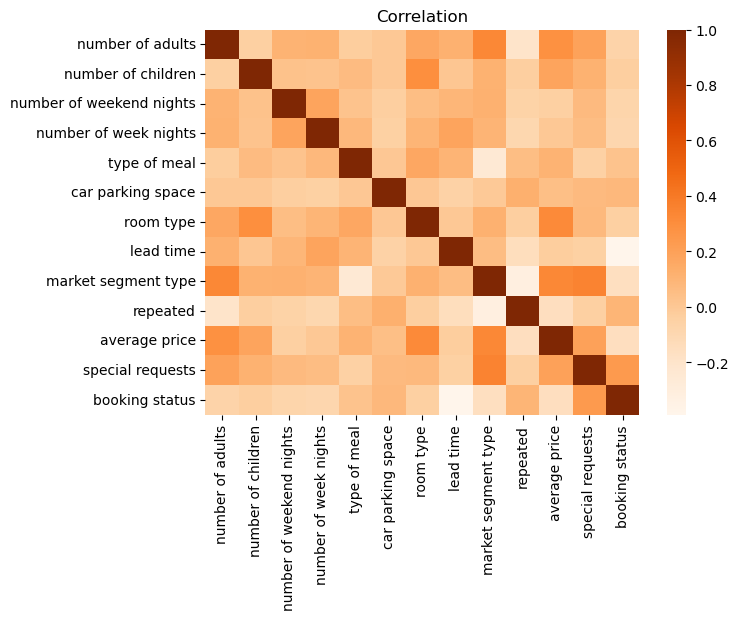

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = h_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")

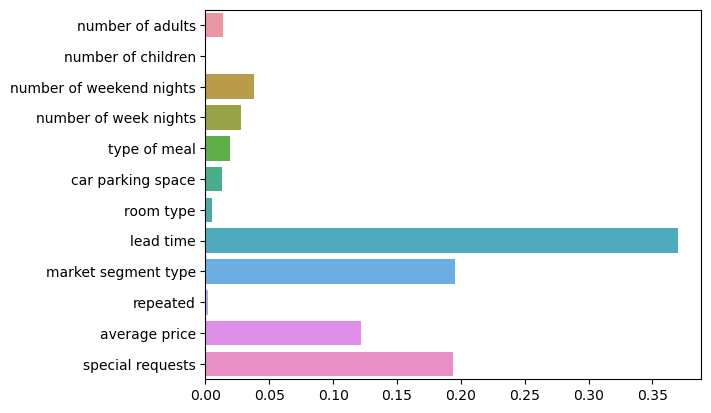

In [38]:
# 피쳐별 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

In [39]:
prediction = dtc.predict(X_test)

In [40]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(dtc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([11,  7,  8, 10,  2,  4,  0,  3,  5,  6,  9,  1], dtype=int64)

In [41]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

special requests: 0.1565
lead time: 0.1421
market segment type: 0.0996
average price: 0.0648
number of weekend nights: 0.0167
type of meal: 0.0154
number of adults: 0.0124
number of week nights: 0.0123
car parking space: 0.0042
room type: 0.0027
repeated: 0.0013
number of children: 0.0003


In [42]:
# 데이터 복사
h_drop_df = h_df.copy()

In [43]:
# 하위 컬럼 제거
h_drop_df.drop(labels=['number of children', 'repeated', 'car parking space', 'room type'],  axis=1, inplace=True)
display(h_drop_df)

,number of adults,number of weekend nights,number of week nights,type of meal,lead time,market segment type,average price,special requests,booking status
0,1,2,5,1,224,3,88.00,0,1
1,1,1,3,0,5,4,106.68,1,1
2,2,1,3,1,1,4,50.00,0,0
3,1,0,2,1,211,4,100.00,1,0
4,1,1,2,0,48,4,77.00,0,0
...,...,...,...,...,...,...,...,...,...
32011,2,1,1,0,48,4,94.50,0,0
32012,2,1,3,1,34,4,107.55,1,1
32013,2,1,3,1,83,4,105.61,1,1
32014,3,0,4,1,121,3,96.90,1,1


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


dtc_parameters = {'max_depth': [10, 20, 30], 'min_samples_split': [60, 70, 80]}
l_svc_parameters = {'C': [0.001, 0.01, 0.1]}
knn_parameters = {'n_neighbors': [3, 5, 7, 9, 11]}

dtc = DecisionTreeClassifier()
l_svc = LinearSVC(verbose=True)
knn = KNeighborsClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_l_svc = GridSearchCV(l_svc, param_grid=l_svc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_knn = GridSearchCV(knn, param_grid=knn_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

# knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
# g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [46]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [60, 70, 80]},
             return_train_score=True)

In [47]:
g_l_svc.fit(X_train_over, y_train_over)

[LibLinear]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearSVC(verbose=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1]}, return_train_score=True)

In [48]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

### **🚑 DTC**

In [49]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 60}",0.849891,1
1,"{'max_depth': 10, 'min_samples_split': 70}",0.848826,2
2,"{'max_depth': 10, 'min_samples_split': 80}",0.848042,3
3,"{'max_depth': 20, 'min_samples_split': 60}",0.847397,5
4,"{'max_depth': 20, 'min_samples_split': 70}",0.845184,8
5,"{'max_depth': 20, 'min_samples_split': 80}",0.845184,8
6,"{'max_depth': 30, 'min_samples_split': 60}",0.847593,4
7,"{'max_depth': 30, 'min_samples_split': 70}",0.845296,7
8,"{'max_depth': 30, 'min_samples_split': 80}",0.845352,6


In [50]:
prediction = dtc.predict(X_test)

오차 행렬
[[1448  398]
 [ 618 3940]]
정확도: 0.8413, 정밀도: 0.8046, 재현율: 0.8244, F1: 0.8130
################################################################################


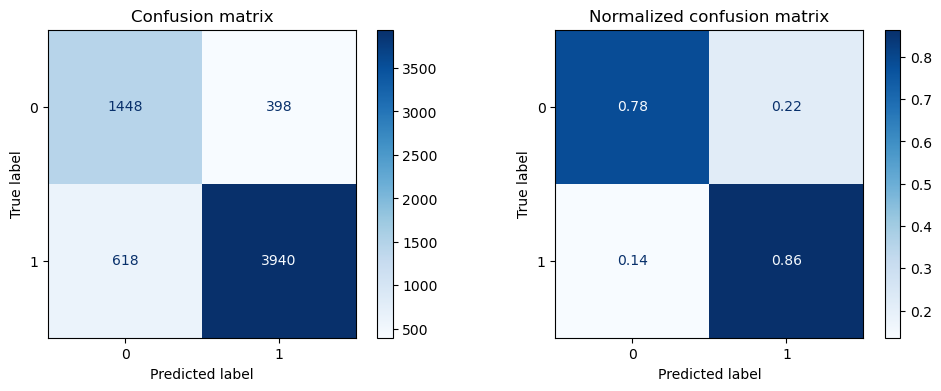

In [51]:
get_evaluation(y_test, prediction, dtc, X_test)

### **🚑 SVC**

In [52]:
l_svc_result_df = pd.DataFrame(g_l_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(l_svc_result_df)

,params,mean_test_score,rank_test_score
0,{'C': 0.001},0.771782,2
1,{'C': 0.01},0.777302,1
2,{'C': 0.1},0.674511,3


In [53]:
svc = g_l_svc.best_estimator_
prediction = g_l_svc.predict(X_test)

오차 행렬
[[1379  467]
 [1127 3431]]
정확도: 0.7511, 정밀도: 0.7152, 재현율: 0.7499, F1: 0.7226
################################################################################


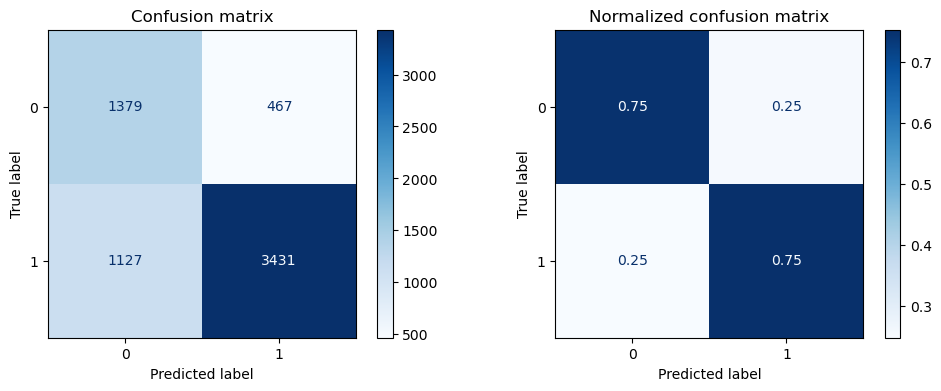

In [54]:
get_evaluation(y_test, prediction, svc, X_test)

### **🚑 KNN**

In [55]:
result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 3},0.841514,1
1,{'n_neighbors': 5},0.825965,2
2,{'n_neighbors': 7},0.817841,3
3,{'n_neighbors': 9},0.808399,4
4,{'n_neighbors': 11},0.799378,5


In [56]:
knn_c = g_knn.best_estimator_
prediction = knn_c.predict(X_test)

오차 행렬
[[1393  453]
 [ 840 3718]]
정확도: 0.7981, 정밀도: 0.7576, 재현율: 0.7852, F1: 0.7674
################################################################################


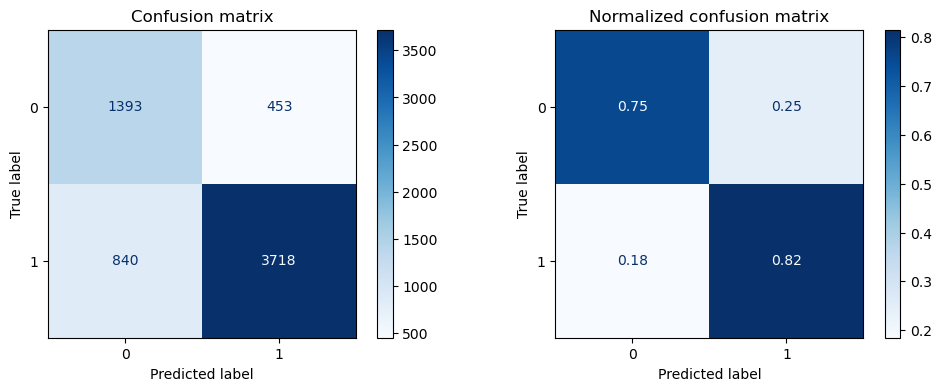

In [57]:
get_evaluation(y_test, prediction, knn_c, X_test)

#### 📊 2Cycle 결과 
분포가 좋지 않은 독립변수중 중요도와 상관관계를 확인한 후 하위 4개의 피쳐를 제거하였습니다.  
제거 후 dtc의 정확도와 정밀도, 재현율이 소폭 상승하였습니다.  
스탠다드스케일링을 통하여 좀 더 표준화를 시켜 학습해봅니다.  

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


dtc_parameters = {'dtc__max_depth': [10, 20, 30], 'dtc__min_samples_split': [60, 70, 80]}
l_svc_parameters = {'svc__C': [0.001, 0.01, 0.1]}
knn_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

dtc = DecisionTreeClassifier()
l_svc = LinearSVC(verbose=True)
knn = KNeighborsClassifier()

dtc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('dtc', dtc)])
g_dtc = GridSearchCV(dtc_pipe, param_grid=dtc_parameters, cv=3, refit=True, return_train_score=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', l_svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=l_svc_parameters, cv=3, refit=True, return_train_score=True)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=3, refit=True, return_train_score=True)

In [59]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__max_depth': [10, 20, 30],
                         'dtc__min_samples_split': [60, 70, 80]},
             return_train_score=True)

In [60]:
g_svc.fit(X_train_over, y_train_over)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', LinearSVC(verbose=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1]},
             return_train_score=True)

In [61]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [62]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'dtc__max_depth': 10, 'dtc__min_samples_split...",0.849807,1
1,"{'dtc__max_depth': 10, 'dtc__min_samples_split...",0.848714,2
2,"{'dtc__max_depth': 10, 'dtc__min_samples_split...",0.848098,3
3,"{'dtc__max_depth': 20, 'dtc__min_samples_split...",0.847341,5
4,"{'dtc__max_depth': 20, 'dtc__min_samples_split...",0.845240,7
5,"{'dtc__max_depth': 20, 'dtc__min_samples_split...",0.845240,8
6,"{'dtc__max_depth': 30, 'dtc__min_samples_split...",0.847509,4
7,"{'dtc__max_depth': 30, 'dtc__min_samples_split...",0.845212,9
8,"{'dtc__max_depth': 30, 'dtc__min_samples_split...",0.845408,6


In [63]:
prediction = dtc.predict(X_test)

오차 행렬
[[1448  398]
 [ 619 3939]]
정확도: 0.8412, 정밀도: 0.8044, 재현율: 0.8243, F1: 0.8129
################################################################################


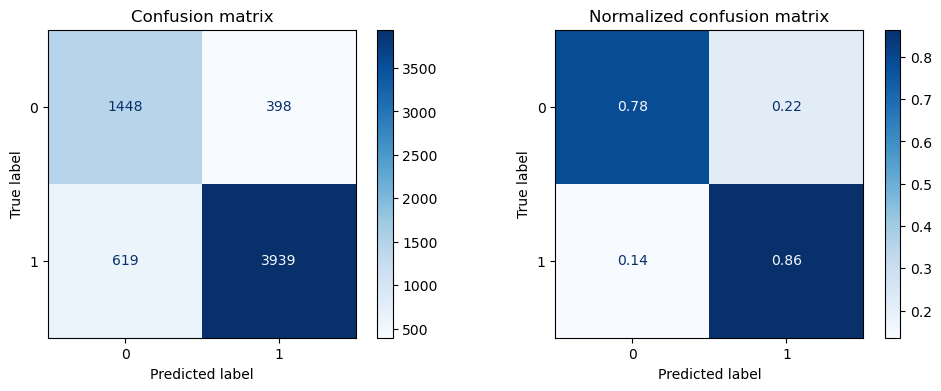

In [64]:
get_evaluation(y_test, prediction, dtc, X_test)

In [65]:
l_svc_result_df = pd.DataFrame(g_l_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(l_svc_result_df)

,params,mean_test_score,rank_test_score
0,{'C': 0.001},0.771782,2
1,{'C': 0.01},0.777302,1
2,{'C': 0.1},0.674511,3


In [66]:
svc = g_l_svc.best_estimator_
prediction = g_l_svc.predict(X_test)

오차 행렬
[[1379  467]
 [1127 3431]]
정확도: 0.7511, 정밀도: 0.7152, 재현율: 0.7499, F1: 0.7226
################################################################################


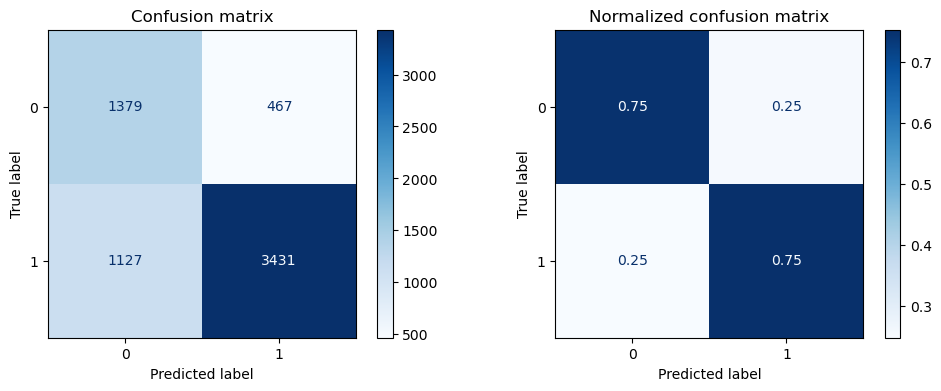

In [67]:
get_evaluation(y_test, prediction, svc, X_test)

In [68]:
result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.841094,1
1,{'knn__n_neighbors': 5},0.838768,2
2,{'knn__n_neighbors': 7},0.836191,3
3,{'knn__n_neighbors': 9},0.835266,4
4,{'knn__n_neighbors': 11},0.834930,5


In [69]:
knn_c = g_knn.best_estimator_
prediction = knn_c.predict(X_test)

오차 행렬
[[1447  399]
 [ 677 3881]]
정확도: 0.8320, 정밀도: 0.7940, 재현율: 0.8177, F1: 0.8036
################################################################################


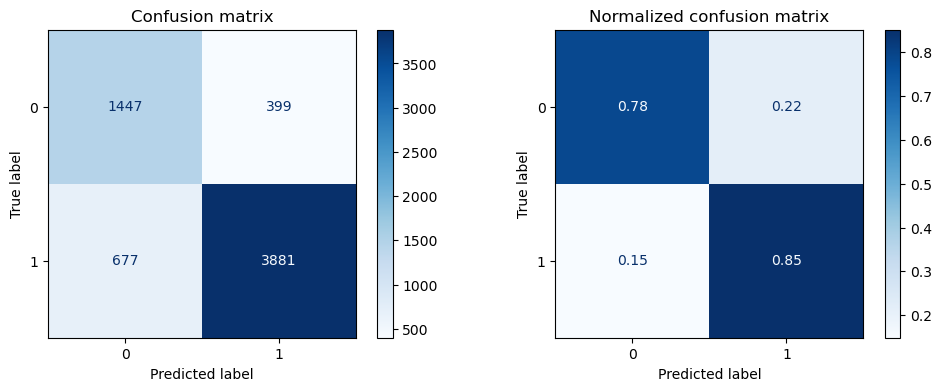

In [70]:
get_evaluation(y_test, prediction, knn_c, X_test)

#### 📊 3Cycle 결과 
스탠다드 스케일링 결과 knn만 상승하였습니다.  
dtc는 그대로, svc는 cost값을 높이고, knn만 파이프라인을 사용하여 스탠다드 스케일링을 진행합니다.  
linearSVC 의 결과가 좋아 svc로 다시 훈련하여 분석 결과에 사용합니다.

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


dtc_parameters = {'max_depth': [10, 20, 30], 'min_samples_split': [60, 70, 80]}
svc_parameters = {'C': [0.001, 0.01, 0.1]}
knn_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

dtc = DecisionTreeClassifier()
svc = SVC(verbose=True)
knn = KNeighborsClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_svc = GridSearchCV(svc, param_grid=svc_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=3, refit=True, return_train_score=True)

In [72]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [60, 70, 80]},
             return_train_score=True)

In [73]:
g_svc.fit(X_train_over, y_train_over)

[LibSVM]

GridSearchCV(cv=3, estimator=SVC(verbose=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1]}, return_train_score=True)

In [74]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [114]:
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)

In [128]:
svc = g_svc.best_estimator_
svc_prediction = g_l_svc.predict(X_test)

In [129]:
knn = g_knn.best_estimator_
knn_prediction = knn.predict(X_test)

### **🚑 Random Forest**

In [78]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [60, 70, 80]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [60, 70, 80]})

In [79]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 60}",0.859129,7
1,"{'max_depth': 10, 'min_samples_split': 70}",0.856317,9
2,"{'max_depth': 10, 'min_samples_split': 80}",0.857371,8
3,"{'max_depth': 20, 'min_samples_split': 60}",0.866820,2
4,"{'max_depth': 20, 'min_samples_split': 70}",0.865649,3
5,"{'max_depth': 20, 'min_samples_split': 80}",0.864556,6
6,"{'max_depth': 30, 'min_samples_split': 60}",0.868109,1
7,"{'max_depth': 30, 'min_samples_split': 70}",0.865415,4
8,"{'max_depth': 30, 'min_samples_split': 80}",0.865180,5


In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [81]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

오차 행렬
[[1323  599]
 [ 278 4204]]
정확도: 0.8631, 정밀도: 0.8508, 재현율: 0.8132, F1: 0.8283
################################################################################


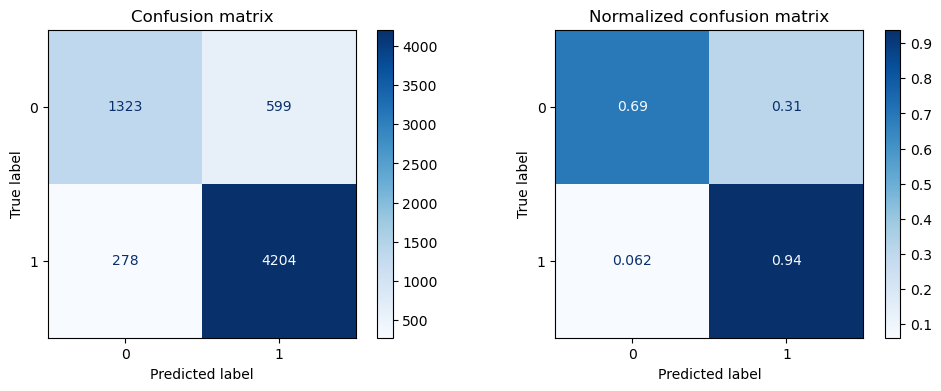

In [82]:
get_evaluation(y_test, prediction, rfc, X_test)

In [83]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'rfc__max_depth': [10, 20, 30],
    'rfc__min_samples_split': [60, 70, 80]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets =  h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

rfc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('rfc', rfc)])

g_rfc = GridSearchCV(rfc_pipe, param_grid=parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [10, 20, 30],
                         'rfc__min_samples_split': [60, 70, 80]})

In [84]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.858777,7
1,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.856591,9
2,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.856981,8
3,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.866664,2
4,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.865376,3
5,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.864204,5
6,"{'rfc__max_depth': 30, 'rfc__min_samples_split...",0.867796,1
7,"{'rfc__max_depth': 30, 'rfc__min_samples_split...",0.865258,4
8,"{'rfc__max_depth': 30, 'rfc__min_samples_split...",0.863658,6


In [130]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

오차 행렬
[[1337  585]
 [ 279 4203]]
정확도: 0.8651, 정밀도: 0.8526, 재현율: 0.8167, F1: 0.8313
################################################################################


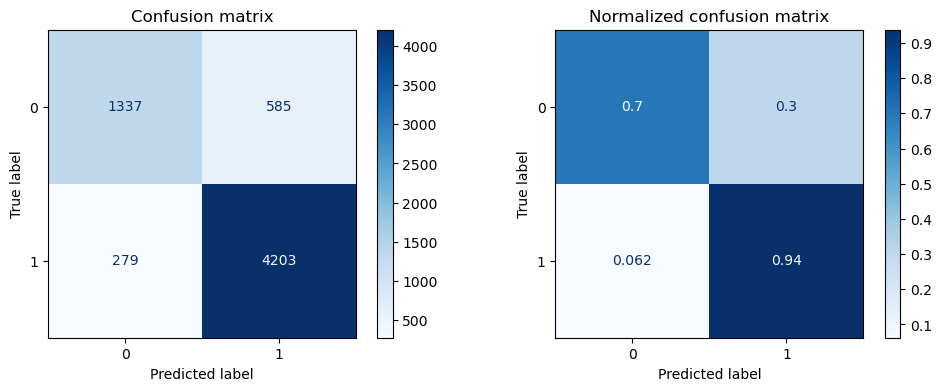

In [86]:
get_evaluation(y_test, prediction, rfc, X_test)

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'rfc__max_depth': [10, 20, 30],
    'rfc__min_samples_split': [60, 70, 80, 90]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets =  h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

rfc_pipe = Pipeline([('min_max_scaler', MinMaxScaler()), ('rfc', rfc)])

g_rfc = GridSearchCV(rfc_pipe, param_grid=parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [10, 20, 30],
                         'rfc__min_samples_split': [60, 70, 80, 90]})

In [88]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.857996,9
1,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.857606,10
2,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.856005,12
3,"{'rfc__max_depth': 10, 'rfc__min_samples_split...",0.856083,11
4,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.868265,1
5,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.865376,3
6,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.864595,6
7,"{'rfc__max_depth': 20, 'rfc__min_samples_split...",0.863814,7
8,"{'rfc__max_depth': 30, 'rfc__min_samples_split...",0.866703,2
9,"{'rfc__max_depth': 30, 'rfc__min_samples_split...",0.864907,4


In [117]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)

오차 행렬
[[1333  589]
 [ 284 4198]]
정확도: 0.8637, 정밀도: 0.8507, 재현율: 0.8151, F1: 0.8296
################################################################################


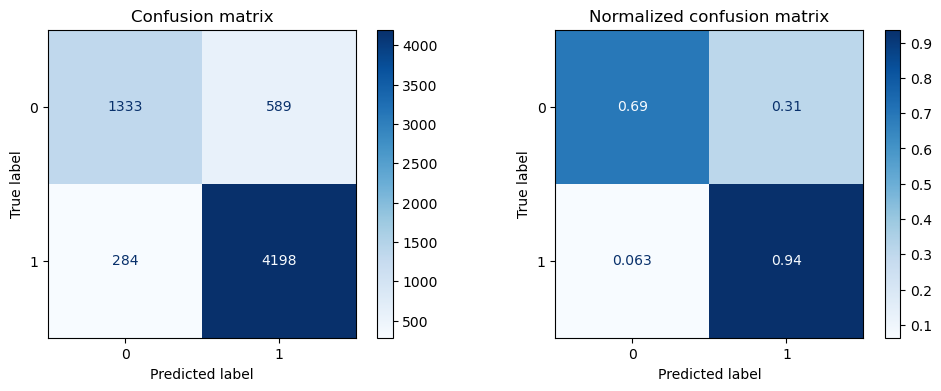

In [90]:
get_evaluation(y_test, prediction, rfc, X_test)

#### 📊 3Cycle 결과 
전체적으로 정확도, 정밀도, 재현율이 나쁘지 않았으나 답을 맞추는 비율이 스탠다드 스케일링 결과가 가장 좋았습니다.  
랜덤 포레스트는 스탠다드 스케일링을 이용한 분석 방법으로 진행합니다.  

### **🚑 Boosting - Adaboost**

In [91]:
from sklearn.ensemble import AdaBoostClassifier

parmeters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

adabc = AdaBoostClassifier()

g_ada = GridSearchCV(adabc, param_grid=parmeters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [92]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.798454,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.800471,11
2,"{'learning_rate': 0.3, 'n_estimators': 150}",0.800891,9
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.800976,8
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.801676,6
5,"{'learning_rate': 0.5, 'n_estimators': 150}",0.802180,5
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.801536,7
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.803553,3
8,"{'learning_rate': 0.7, 'n_estimators': 150}",0.804337,1
9,"{'learning_rate': 1, 'n_estimators': 50}",0.800611,10


In [93]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)

오차 행렬
[[1424  498]
 [ 835 3647]]
정확도: 0.7918, 정밀도: 0.7551, 재현율: 0.7773, F1: 0.7633
################################################################################


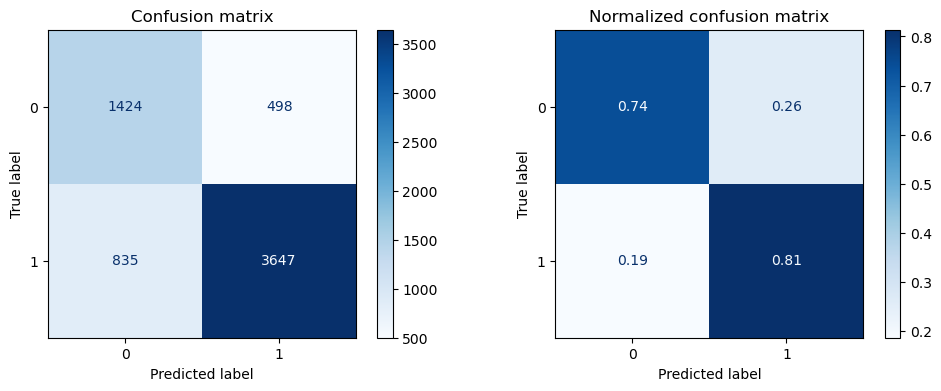

In [94]:
get_evaluation(y_test, ada_prediction, ada, X_test)

### **🚑 Boosting - GBM**

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [96]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.837116,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.850003,8
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.869475,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.846978,11
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.857484,6
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.871156,1
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.849779,9
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.858044,5
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.866673,4
9,"{'learning_rate': 1, 'n_estimators': 50}",0.849387,10


In [97]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)

오차 행렬
[[1595  327]
 [ 390 4092]]
정확도: 0.8880, 정밀도: 0.8648, 재현율: 0.8714, F1: 0.8680
################################################################################


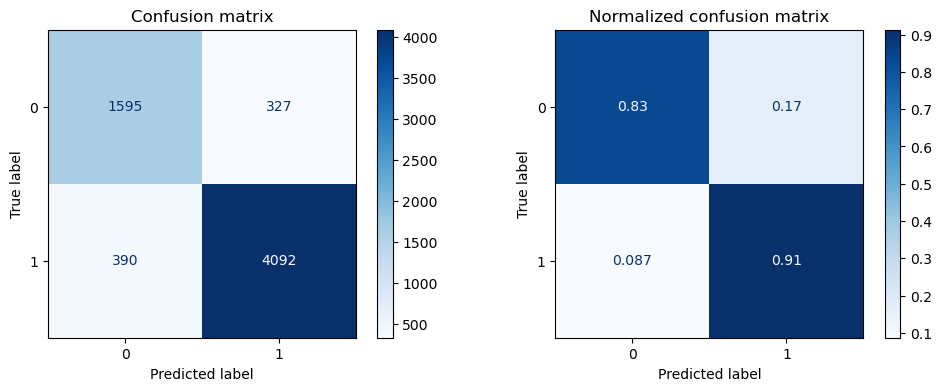

In [98]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)

### **🚑 Boosting - XGboost**

In [99]:
from xgboost import XGBClassifier

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

In [100]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-logloss:0.51145	validation_1-logloss:0.50858
[1]	validation_0-logloss:0.44330	validation_1-logloss:0.43882
[2]	validation_0-logloss:0.40893	validation_1-logloss:0.40436
[3]	validation_0-logloss:0.39398	validation_1-logloss:0.38854
[4]	validation_0-logloss:0.38081	validation_1-logloss:0.37250
[5]	validation_0-logloss:0.37339	validation_1-logloss:0.36414
[6]	validation_0-logloss:0.36921	validation_1-logloss:0.35974
[7]	validation_0-logloss:0.36645	validation_1-logloss:0.35636
[8]	validation_0-logloss:0.36123	validation_1-logloss:0.35081
[9]	validation_0-logloss:0.35905	validation_1-logloss:0.34947
[10]	validation_0-logloss:0.35619	validation_1-logloss:0.34624
[11]	validation_0-logloss:0.35074	validation_1-logloss:0.33943
[12]	validation_0-logloss:0.34784	validation_1-logloss:0.33636
[13]	validation_0-logloss:0.34281	validation_1-logloss:0.33134
[14]	validation_0-logloss:0.34044	validation_1-logloss:0.32810
[15]	validation_0-logloss:0.33699	validation_1-logloss:0.32375
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.32176	validation_1-logloss:0.31036
[26]	validation_0-logloss:0.31861	validation_1-logloss:0.30712
[27]	validation_0-logloss:0.31674	validation_1-logloss:0.30546
[28]	validation_0-logloss:0.31433	validation_1-logloss:0.30223
[29]	validation_0-logloss:0.31160	validation_1-logloss:0.29912
[30]	validation_0-logloss:0.31108	validation_1-logloss:0.29867
[31]	validation_0-logloss:0.31019	validation_1-logloss:0.29757
[32]	validation_0-logloss:0.30712	validation_1-logloss:0.29446
[33]	validation_0-logloss:0.30524	validation_1-logloss:0.29255
[34]	validation_0-logloss:0.30319	validation_1-logloss:0.29068
[35]	validation_0-logloss:0.30127	validation_1-logloss:0.28821
[36]	validation_0-logloss:0.30113	validation_1-logloss:0.28793
[37]	validation_0-logloss:0.30066	validation_1-logloss:0.28745
[38]	validation_0-logloss:0.29997	validation_1-logloss:0.28662
[39]	validation_0-logloss:0.29868	validation_1-logloss:0.28501
[40]	validation_0-logloss:0.29672	validation_1-logloss:

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [101]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.868130,12
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.876198,9
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.891159,2
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.873509,11
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.881437,7
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.893036,1
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.876479,8
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.882978,5
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.890571,3
9,"{'learning_rate': 1, 'n_estimators': 50}",0.875358,10


In [102]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)

오차 행렬
[[1797  125]
 [ 163 4319]]
정확도: 0.9550, 정밀도: 0.9444, 재현율: 0.9493, F1: 0.9468
################################################################################


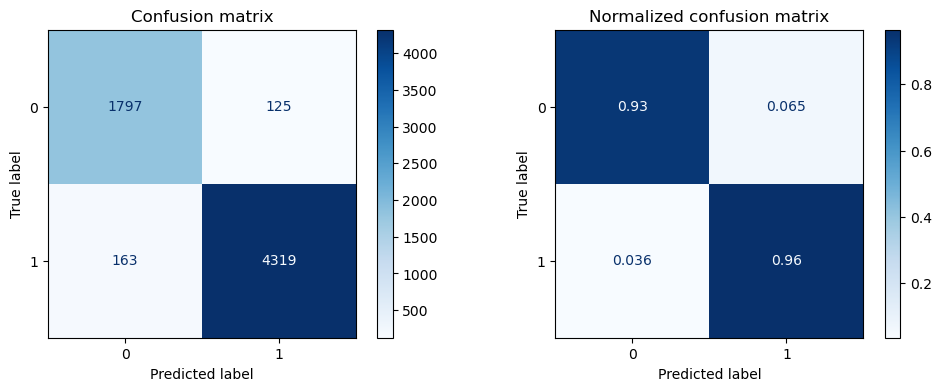

In [103]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)

### **🚑 Boosting - LightGBM**

In [104]:
from lightgbm import LGBMClassifier

parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 17847, number of negative: 17847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 35694, number of used features: 12
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [105]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.871856,8
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.878524,5
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.894773,1
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.875694,7
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.881746,2
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.880821,4
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.876423,6
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.880933,3
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.819216,11
9,"{'learning_rate': 1, 'n_estimators': 50}",0.863031,9


In [106]:
lgbm = g_lgbm.best_estimator_

lgbm_prediction = lgbm.predict(X_test)

오차 행렬
[[1776  146]
 [ 188 4294]]
정확도: 0.9478, 정밀도: 0.9357, 재현율: 0.9410, F1: 0.9383
################################################################################


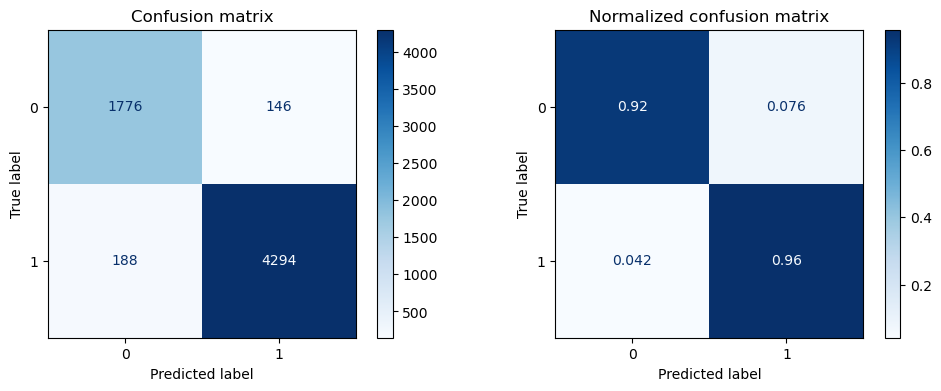

In [107]:
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

### **🚑 Voting**

In [144]:
from sklearn.ensemble import VotingClassifier

soft_vc = VotingClassifier(estimators=[
    ('knn', knn_pipe), ('xgb', xgb), ('lgbm', lgbm)
], voting='soft', n_jobs=-1)

soft_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier())])),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=...
                                            learning_rate=0.5, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.3,
                                             n_estimators=500))],
                 n_jobs=-1, voting='soft')

In [145]:
soft_vc_prediction = soft_vc.predict(X_test)

오차 행렬
[[1645  277]
 [ 419 4063]]
정확도: 0.8913, 정밀도: 0.8666, 재현율: 0.8812, F1: 0.8732
################################################################################


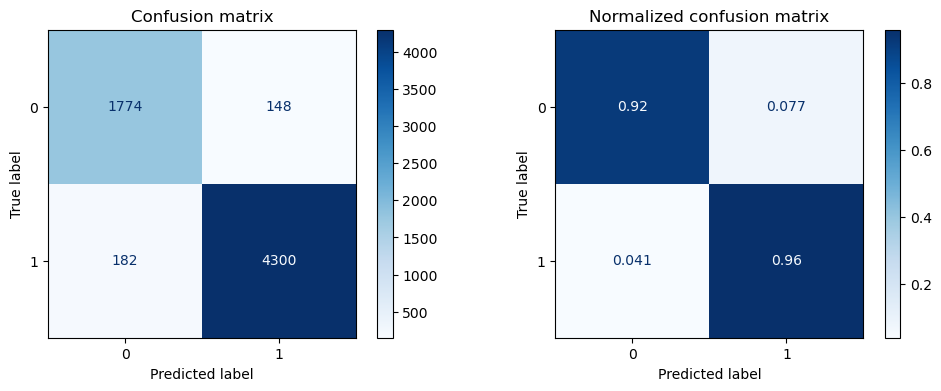

In [146]:
get_evaluation(y_test, prediction, soft_vc, X_test)

In [147]:
from sklearn.ensemble import VotingClassifier

hard_vc = VotingClassifier(estimators=[
    ('knn', knn_pipe), ('xgb', xgb), ('lgbm', lgbm)
], voting='hard', n_jobs=-1)

hard_vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier())])),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=...
                                            learning_rate=0.5, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.3,
                                             n_estimators=500))],
                 n_jobs=-1)

In [148]:
hard_vc_prediction = hard_vc.predict(X_test)

오차 행렬
[[1645  277]
 [ 419 4063]]
정확도: 0.8913, 정밀도: 0.8666, 재현율: 0.8812, F1: 0.8732
################################################################################


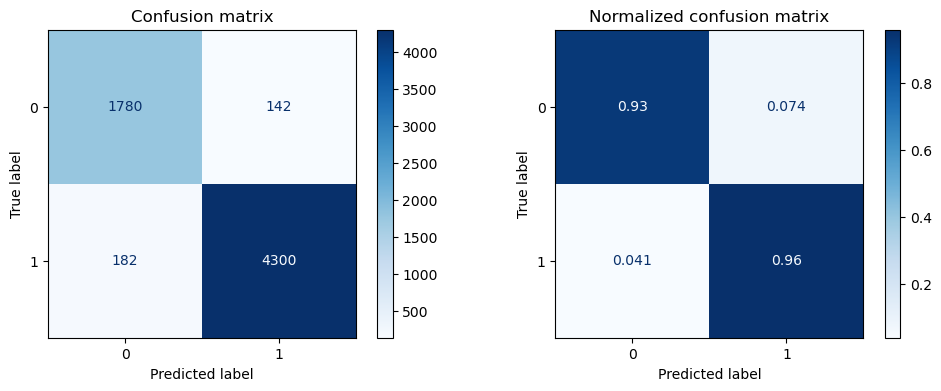

In [149]:
get_evaluation(y_test, prediction, hard_vc, X_test)

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc_accuracy = accuracy_score(y_test, dtc_prediction)
svc_accuracy = accuracy_score(y_test, svc_prediction)
knn_accuracy = accuracy_score(y_test, knn_prediction)
rfc_accuracy = accuracy_score(y_test, rfc_prediction)

dtc_precision = precision_score(y_test, dtc_prediction, average='macro')
svc_precision = precision_score(y_test, svc_prediction, average='macro')
knn_precision = precision_score(y_test, knn_prediction, average='macro')
rfc_precision = precision_score(y_test, rfc_prediction, average='macro')

dtc_recall = recall_score(y_test, dtc_prediction, average='macro')
svc_recall = recall_score(y_test, svc_prediction, average='macro')
knn_recall = recall_score(y_test, knn_prediction, average='macro')
rfc_recall = recall_score(y_test, rfc_prediction, average='macro')

dtc_f1 = f1_score(y_test, dtc_prediction, average='macro')
svc_f1 = f1_score(y_test, svc_prediction, average='macro')
knn_f1 = f1_score(y_test, knn_prediction, average='macro')
rfc_f1 = f1_score(y_test, rfc_prediction, average='macro')

s_vc_accuracy = accuracy_score(y_test, soft_vc_prediction)
h_vc_accuracy = accuracy_score(y_test, hard_vc_prediction)
ada_accuracy = accuracy_score(y_test, ada_prediction)
gbc_accuracy = accuracy_score(y_test, gbc_prediction)
xgb_accuracy = accuracy_score(y_test, xgb_prediction)
lgbm_accuracy = accuracy_score(y_test, lgbm_prediction)

s_vc_precision = precision_score(y_test, soft_vc_prediction, average='macro')
h_vc_precision = precision_score(y_test, hard_vc_prediction, average='macro')
ada_precision = precision_score(y_test, ada_prediction, average='macro')
gbc_precision = precision_score(y_test, gbc_prediction, average='macro')
xgb_precision = precision_score(y_test, xgb_prediction, average='macro')
lgbm_precision = precision_score(y_test, lgbm_prediction, average='macro')

s_vc_recall = recall_score(y_test, soft_vc_prediction, average='macro')
h_vc_recall = recall_score(y_test, hard_vc_prediction, average='macro')
ada_recall = recall_score(y_test, ada_prediction, average='macro')
gbc_recall = recall_score(y_test, gbc_prediction, average='macro')
xgb_recall = recall_score(y_test, xgb_prediction, average='macro')
lgbm_recall = recall_score(y_test, lgbm_prediction, average='macro')

s_vc_f1 = f1_score(y_test, soft_vc_prediction, average='macro')
h_vc_f1 = f1_score(y_test, hard_vc_prediction, average='macro')
ada_f1 = f1_score(y_test, ada_prediction, average='macro')
gbc_f1 = f1_score(y_test, gbc_prediction, average='macro')
xgb_f1 = f1_score(y_test, xgb_prediction, average='macro')
lgbm_f1 = f1_score(y_test, lgbm_prediction, average='macro')

models = ['DTC', 'SVC', 'KNN', 'RFC', 'SOFT_VC', 'HARD_VC', 'ADA', 'GBC', 'XGB', 'LGBM']
accuracy_scores = [dtc_accuracy, svc_accuracy, knn_accuracy, rfc_accuracy, s_vc_accuracy, h_vc_accuracy, ada_accuracy, gbc_accuracy, xgb_accuracy, lgbm_accuracy]
precisions = [dtc_precision, svc_precision, knn_precision, rfc_precision, s_vc_precision, h_vc_precision, ada_precision, gbc_precision, xgb_precision, lgbm_precision]
recalls = [dtc_recall, svc_recall, knn_recall, rfc_recall, s_vc_recall, h_vc_recall, ada_recall, gbc_recall, xgb_recall, lgbm_recall]
f1_scores = [dtc_f1, svc_f1, knn_f1, rfc_f1, s_vc_f1, h_vc_f1, ada_f1, gbc_f1, xgb_f1, lgbm_f1]

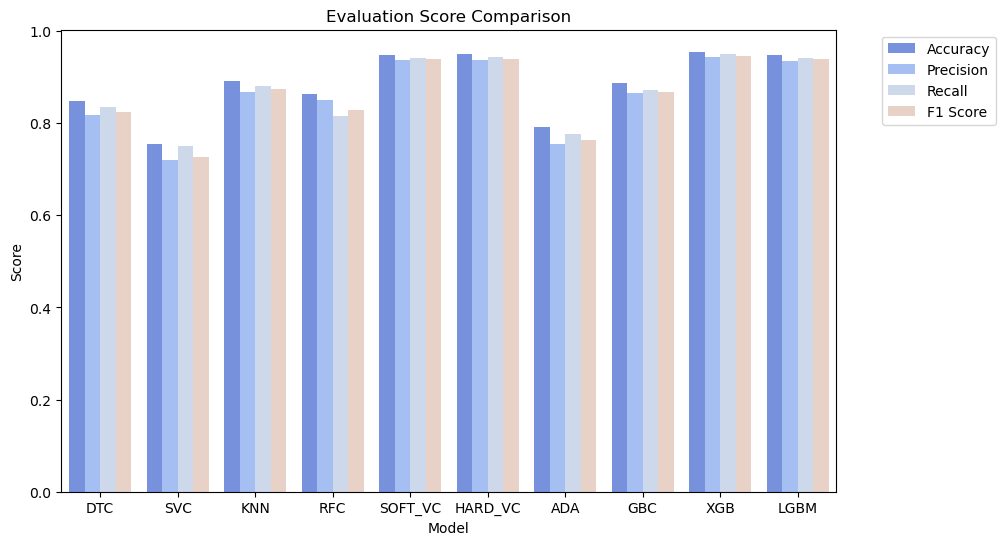

In [151]:
data = {
    'Model': models * 4,
    'Score': accuracy_scores + precisions + recalls + f1_scores,
    'Metric': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models) + ['F1 Score'] * len(models)
}

df = pd.DataFrame(data)

palette = sns.color_palette("coolwarm")

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Model', y='Score', hue='Metric', palette=palette)

plt.title('Evaluation Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

### **🚑 결론**

그래프로 보았을 때, knn, xgb, lgbm 을 넣어서 만든 voting과 sgb, lgbm 이 정확도, 정밀도, 재현율, f1score 가 균일하게 나타났다.  
4가지 모델의 오차행렬을 비교한 다음 제일 나은 모델의 정밀도, 재현율을 살펴본다.  

오차 행렬
[[1774  148]
 [ 182 4300]]
정확도: 0.9485, 정밀도: 0.9368, 재현율: 0.9412, F1: 0.9390
################################################################################


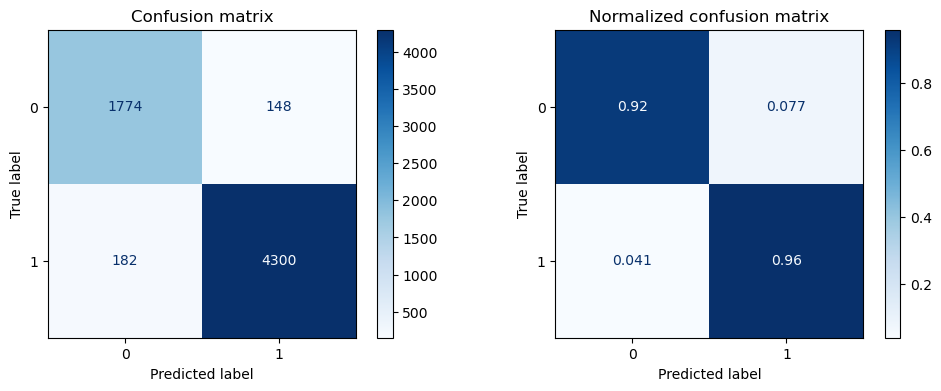

오차 행렬
[[1780  142]
 [ 182 4300]]
정확도: 0.9494, 정밀도: 0.9376, 재현율: 0.9428, F1: 0.9401
################################################################################


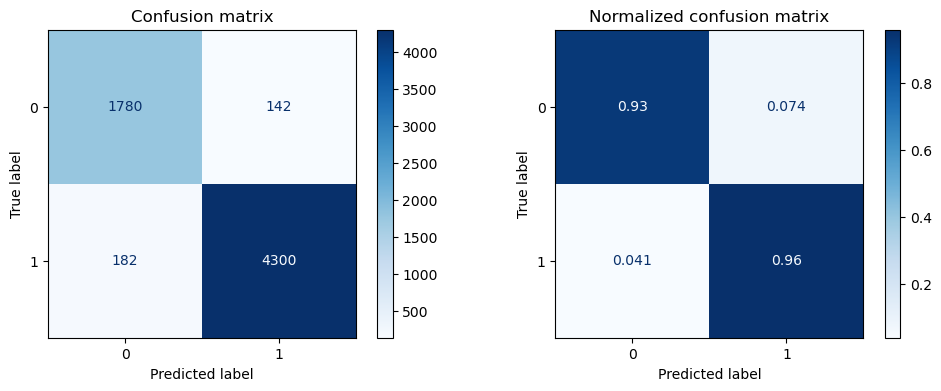

오차 행렬
[[1797  125]
 [ 163 4319]]
정확도: 0.9550, 정밀도: 0.9444, 재현율: 0.9493, F1: 0.9468
################################################################################


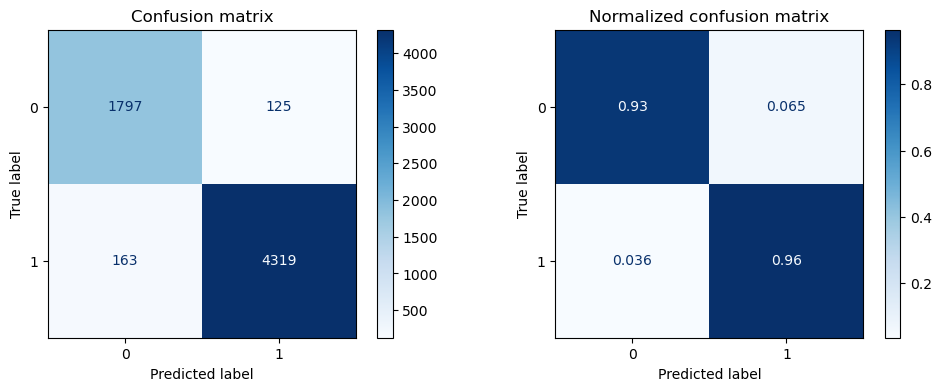

오차 행렬
[[1776  146]
 [ 188 4294]]
정확도: 0.9478, 정밀도: 0.9357, 재현율: 0.9410, F1: 0.9383
################################################################################


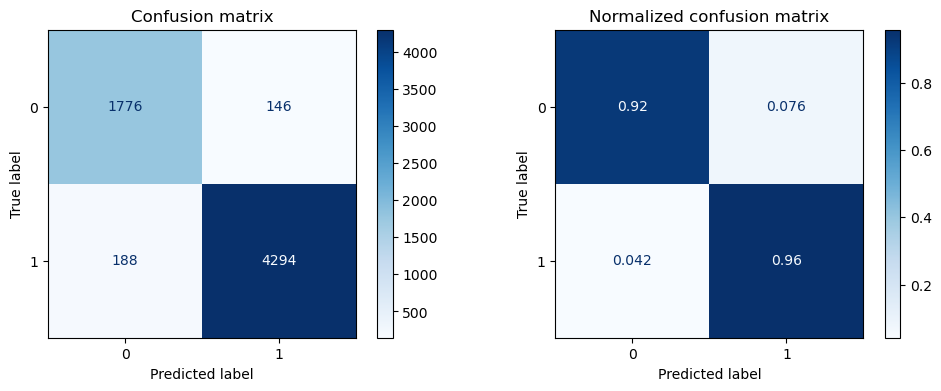

In [152]:
get_evaluation(y_test, soft_vc_prediction, soft_vc, X_test)
get_evaluation(y_test, hard_vc_prediction, hard_vc, X_test)
get_evaluation(y_test, xgb_prediction, xgb, X_test)
get_evaluation(y_test, lgbm_prediction, lgbm, X_test)

전체적으로 전부 다 0.9를 넘었으며 오차행렬에서 정답을 맞춘 확률이 가장 고르면서 정밀도와 재현율의 차이가 크지않은 xgb 모델을 선택하기로 했다.

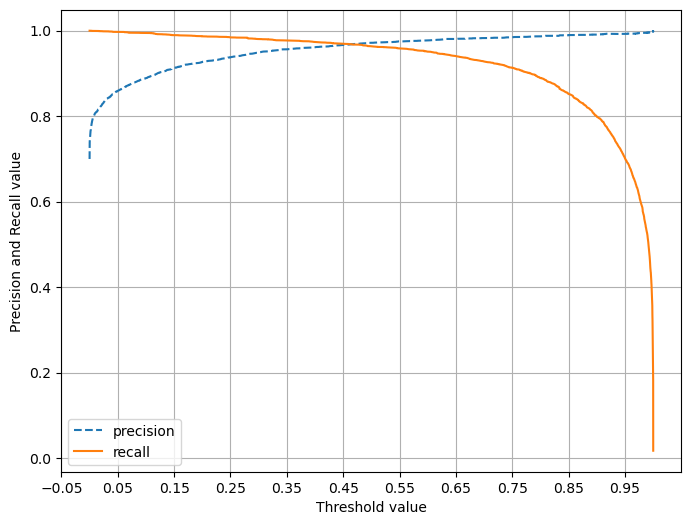

In [153]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

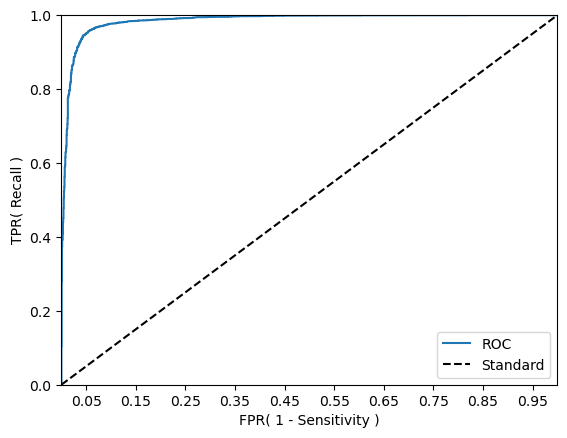

In [154]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1, 1))

**XGBoost가 가장 적합한 모델이라고 판단됩니다.**  